<h1>Random Forest (Classification)</h1>
※Random Forest Regression (RandomForestRegressor) は割愛

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

決定木と同様に、データのスケール変換は不要<br>
テキストデータなどの、非常に高次元で疎なデータセットに対してはうまく機能しない傾向<br>
ランダムフォレストは線形モデルよりも多くのメモリを消費し訓練も予測も遅いため、実行時間やメモリが重要なアプリケーションでは線形モデルを使った方がよい<br>
ブートストラップサンプリング（一般にバギング、ペースティングも可能）によって、ランダムフォレスト中の個々の決定木が少しずつ違うデータセットに対して構築される。さらに個々のノードでランダムに特徴量のサブセットを選ぶことによって、それぞれの決定木は異なる特徴量のサブセットに対して分割を行う。これらが組み合わさり、ランダムフォレスト中の決定木が異なるものになる<br>
予測を行う際はまずすべての決定木に対して予測を行う。回帰の場合はこれらの結果の平均値を最終的な予測値とする。クラス分類の場合は「ソフト投票」戦略が用いられる。これはそれぞれの決定木が「ソフト」な予想を行い、個々の出力ラベルに対して確率を出力する。すべての決定木による確率予測を平均し、最も確率が高いラベルを予測値とする<br>
RandomFOrestClassifierは、DecisionTreeClassifierとBaggingClassiferのハイパーパラメータをすべて持つ<br>
ランダムフォレストアルゴリズムは、ノードを分割するときに最良の特徴量を探すのではなく、特徴量の無作為なサブセットから最長の特徴量を探す(DecisionTreeClassifierのsplitter="random")。その分、木の多様性が増す

<h4>重要なパラメータ</h4>
・n_estimators⇒構築する決定木の数<br>
「時間とメモリのある限り大きくする」とよい<br>
・max_samples⇒If bootstrap is True, the number of samples to draw from X to train each base estimator.<br>
・max_features⇒個々のノードで使用する特徴量の数<br>
一般にはデフォルト値（クラス分類⇒max_features=sqrt(n_features)、回帰⇒max_features=n_features）を使うとよい<br>
max_featuresを大きくする⇒ランダムフォレスト中の決定木が似たようなものになり、最も識別性の高い特徴量が使われ、訓練データに容易に適合する<br>
max_featuresを小さくする⇒ランダムフォレスト中の決定木は相互に大幅に異なるものとなるが、それぞれの木をかなり深くしなければデータに適合しない<br>
・事前枝刈りパラメータ<br>
max_depth⇒木の深さ<br>
min_samples_split⇒ノードを分割するために必要なサンプル数の下限<br>
max_leaf_nodes⇒葉っぱの数<br>
min_samples_leaf⇒1枚の葉っぱに属する最小データ数（=1がデフォルトで「分けられるだけ分ける」）<br>
min_weight_fraction_leaf⇒min_samples_leafと同じだが、重み付きインスタンスの総数に対する割合で表現される<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [3]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(X_train, y_train)
print(f"Accuracy on training set: {forest.score(X_train, y_train): .3f}")
print(f"Accuracy on test set: {forest.score(X_test, y_test): .3f}")

Accuracy on training set:  1.000
Accuracy on test set:  0.972
Accuracy on training set:  1.000
Accuracy on test set:  0.972


In [4]:
def plot_feature_importances(model, n_features, feature_names):
    plt.figure(figsize = (16, 8))
    plt.barh(range(n_features), model.feature_importances_, align = "center")
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

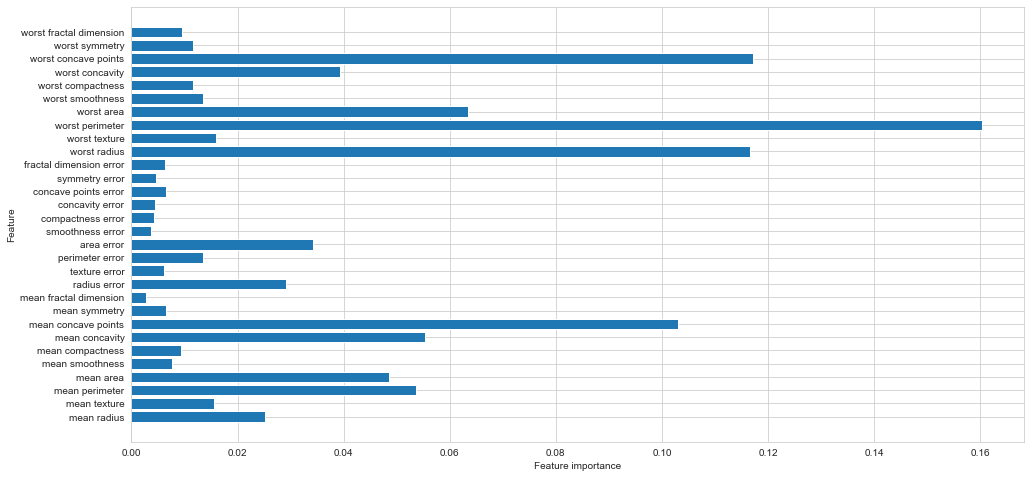

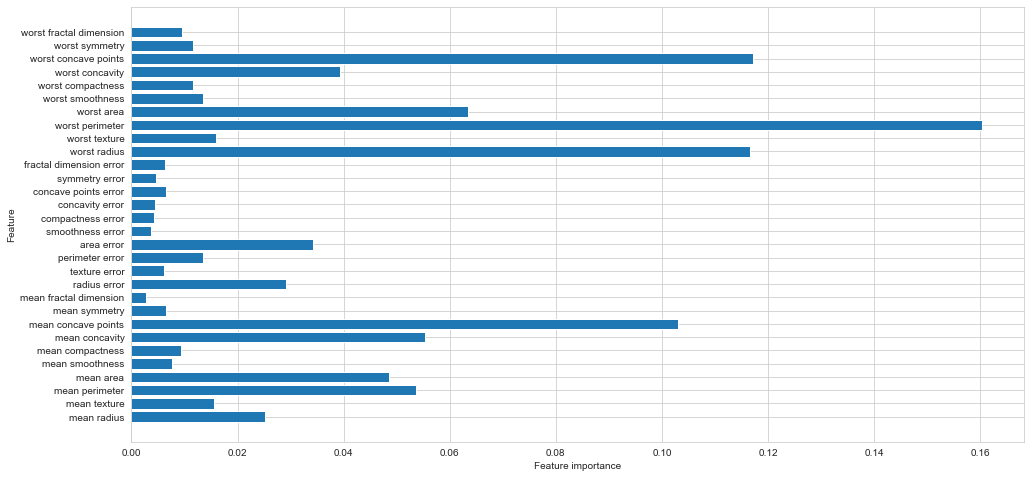

In [5]:
plot_feature_importances(forest, cancer.data.shape[1], cancer.feature_names)
# ランダムフォレストの特徴量の重要度は、個々の決定木の特徴量の重要度を平均したもの

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf.fit(X_train, y_train)
print(rnd_clf.score(X_test, y_test))

bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter = "random", max_leaf_nodes = 16),
                            n_estimators = 500, max_samples = 1.0, bootstrap = True, n_jobs = -1)
bag_clf.fit(X_train, y_train)
print(bag_clf.score(X_test, y_test))

0.972027972027972
0.972027972027972
0.965034965034965
0.965034965034965


<h1>AdaBoost</h1>

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor

アダブースト分類器を作る場合、まずベースの分類器（決定木など）を訓練し、訓練セットを対象として予測をする。そして、分類に失敗した訓練インスタンスの相対的な重みをあげる。次に、更新された重みを使って第二の分類器を訓練し、訓練セットの予測をして、重みを更新する。これを繰り返す<br>
逐次的な学習テクニックは、前の予測器の訓練/評価が終わらなければ次の予測器を訓練できないため、並列化できない<br>

個々のインスタンスにかけられた重みの初期値 $w^{(i)}=1/m$<br>
予測器の訓練後に計算される、その予測器の訓練セットに対する重み付きの誤り率 $r_j=\frac{\sum_{i=1,{\hat{y}_j}^{(i)}\neq y^{(i)}}^{m} w^{(i)}}{\sum_{i=1}^{m} w^{(i)}}$<br>
※j番目の予測器の重み付き誤り率。全重みの内、予測が誤っている重みの割合<br>
重み付き誤り率の次は、予測器の重み$\alpha_j$を計算する $\alpha_j=\eta log \frac{1-r_j}{r_j}$<br>
※$\eta$は学習率ハイパーパラメータ。予測器が正確になればなるほど、重みは高くなる。予測に間違いが多ければ、重みは負数になる<br>
最後に、インスタンスにかけられた重みを更新する $w^{(i)}←\{\begin{array}{l}w^{(i)} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ if \ \ {\hat{y}_j}^{(i)}=y^{(i)} \\ w^{(i)}exp(\alpha_j) \ \ \ \ if \ \ {\hat{y}_j}^{(i)} \neq y^{(i)} \end{array}$<br>
※$i=1,2,...,m$.重み更新後、重みを$\sum_{i=1}^{m} w^{(i)}$で割って正規化する<br>
そして、また予測器の訓練、誤り率、重みの更新が繰り返される。<br>
予測器の数が指定された数に達するか、完全な予測器が見つかると、アルゴリズムは反復をとめる<br>

アダブーストの予測は、全ての予測器の予測を計算し、陽性ならば1、陰性ならば-1に対して、それぞれの時点の予測器の重みをかけて線形結合させた値が、0以上ならば陽性、0より小さければ陰性、と判断する<br>

sklearnのAdaBoostClassifierクラスのデフォルトベース推定器は、決定株（max_depth=1の決定木、すなわちひとつの判断ノードとふたつの葉ノードから構成される決定木）である

In [8]:
from sklearn.ensemble import AdaBoostClassifier

In [9]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators = 200, algorithm = "SAMME.R", learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.951048951048951

0.951048951048951

<h1>Gradient Boosting</h1>

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

勾配ブースティング回帰は、「回帰」とついているが、回帰にもクラス分類にも利用可能<br>
決定木と同様に、データのスケール変換は不要<br>
また、やはり高次元の疎なデータに対してはあまりうまく機能しない<br>
勾配ブースティングでは、1つ前の決定木の誤りを次の決定木が修正するようにして、決定木を順番に作っていく。ここで、個々の決定木がそれまでの決定木の過ちをどれくらい強く補正しようとするかを制御するパラメータがlearning_rateである<br>
勾配ブースティングのポイントは、浅い決定木のような簡単なモデルを多数組み合わせることにある。それぞれの決定木はデータの一部に対してしか良い予測を行えないため、決定木を繰り返し追加し性能を向上させる<br>
勾配ブースティングとランダムフォレストは、同じようなデータを得意とするため、一般にはより頑健なランダムフォレストを先に試した方がよい。予測時間が非常に重要な場合や、機械学習モデルから最後の1%まで性能を絞り出したい場合には勾配ブースティングを試すとよい<br>
勾配ブースティングは、新予測器を前の予測器の残差に適合させようとする<br>
決定木の最適な数は、早期打ち切りを使えばわかる。staged_predict()メソッドで実装可能。このメソッドは、訓練の各ステージ（決定木がひとつ、決定木がふたつ、...）でアンサンブルで行った予測のイテラブルなオブジェクトを返す<br>
訓練を早い段階で打ち切って早期打ち切りを実現することも可能。warm_start=Trueを指定して、fit()メソッドを呼び出した時に、sklearnが既存の決定木を残して、漸進的に訓練を実行できるようにする

<h4>重要なパラメータ</h4>
・n_estimators⇒構築する決定木の数<br>
ランダムフォレストと異なり、n_estimatorsを大きくすると、複雑なモデルを許容することになり、過学習を招くため、n_estimatorsを時間とメモリ量で決めておき、learning_rateに対して探索を行う方法がよく用いられる<br>
・learning_rate（=学習率）<br>
学習率を大きくする⇒個々の決定木が強く補正を行おうとしモデルが複雑化（=過剰適合しやすくなる）<br>
・事前枝刈りパラメータ<br>
max_depth⇒木の深さ（一般に勾配ブースティングではmax_depthは非常に小さく設定され、深さが5以上になることはあまりない）<br>
min_samples_split⇒ノードを分割するために必要なサンプル数の下限<br>
max_leaf_nodes⇒葉っぱの数<br>
min_samples_leaf⇒1枚の葉っぱに属する最小データ数（=1がデフォルトで「分けられるだけ分ける」）<br>
min_weight_fraction_leaf⇒min_samples_leafと同じだが、重み付きインスタンスの総数に対する割合で表現される<br>
max_features⇒各ノードで分割のために評価される特徴量数の上限

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
gbrt = GradientBoostingClassifier(random_state = 0).fit(X_train, y_train)
print(f"Accuracy on training set: {gbrt.score(X_train, y_train): .3f}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test): .3f}")

Accuracy on training set:  1.000
Accuracy on test set:  0.965
Accuracy on training set:  1.000
Accuracy on test set:  0.965


In [12]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1).fit(X_train, y_train)
print(f"Accuracy on training set: {gbrt.score(X_train, y_train): .3f}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test): .3f}")

Accuracy on training set:  0.991
Accuracy on training set:  0.991
Accuracy on test set:  0.972
Accuracy on test set:  0.972


In [13]:
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01).fit(X_train, y_train)
print(f"Accuracy on training set: {gbrt.score(X_train, y_train): .3f}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test): .3f}")

Accuracy on training set:  0.988
Accuracy on test set:  0.965
Accuracy on training set:  0.988
Accuracy on test set:  0.965


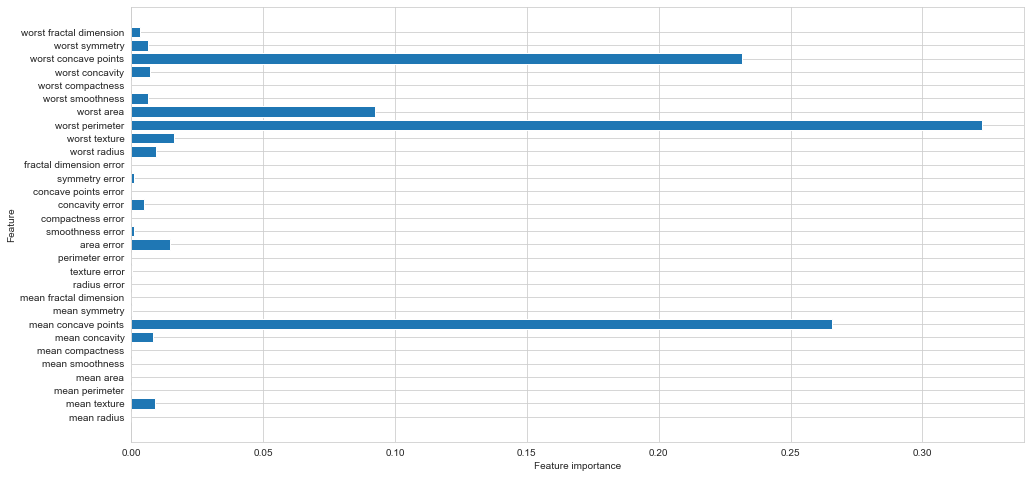

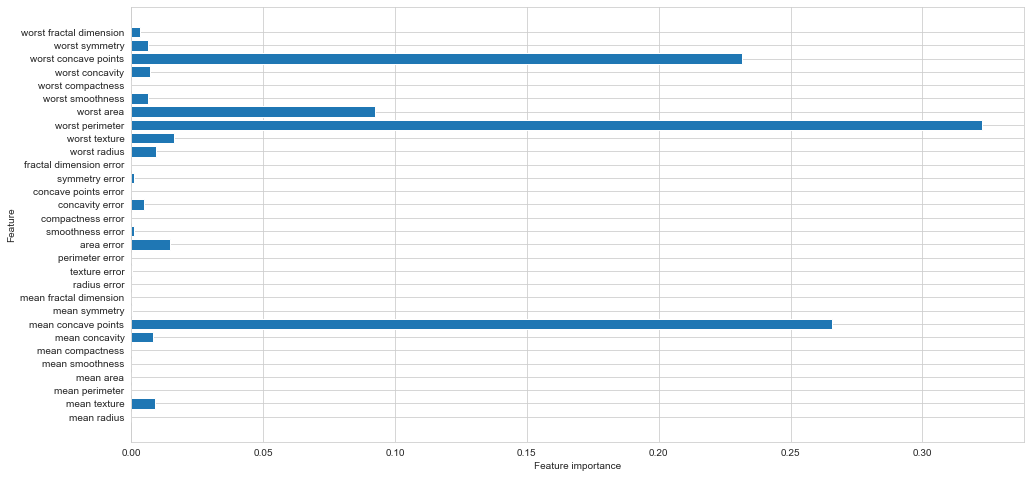

In [14]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1).fit(X_train, y_train)
plot_feature_importances(gbrt, cancer.data.shape[1], cancer.feature_names)

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [16]:
tree_reg1 = DecisionTreeRegressor(max_depth = 2)
tree_reg1.fit(X_train, y_train)
y_pred = tree_reg1.predict(X_test)
print(mean_squared_error(y_test, y_pred))

y2_train = y_train - tree_reg1.predict(X_train)
tree_reg2 = DecisionTreeRegressor(max_depth = 2)
tree_reg2.fit(X_train, y2_train)
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2))
print(mean_squared_error(y_test, y_pred))

y3_train = y2_train - tree_reg2.predict(X_train)
tree_reg3 = DecisionTreeRegressor(max_depth = 2)
tree_reg3.fit(X_train, y3_train)

y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3))
print(mean_squared_error(y_test, y_pred))

0.053720915682420864
0.04878581052344287
0.048985513724590826
0.053720915682420864
0.04878581052344287
0.048985513724590826


In [17]:
from sklearn.ensemble import GradientBoostingRegressor

In [18]:
gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 3, learning_rate = 1.0)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.04898551372459083
0.04898551372459083


In [19]:
gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth = 2, n_estimators = bst_n_estimators)
gbrt_best.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(bst_n_estimators)

0.02858273493590336
36
0.02858273493590336
36


In [20]:
gbrt = GradientBoostingRegressor(max_depth = 2, warm_start = True)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

gbrt_best = GradientBoostingRegressor(max_depth = 2, n_estimators = n_estimators)
gbrt_best.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(bst_n_estimators)

0.027975238251370254
36
0.027975238251370254
36


<h3>ソフト投票とハード投票</h3>
各分類器の確率予測を平均し、最も確率が高いラベルを予測値とするのが、ソフト投票分類器であった（RandomForestなど）<br>
各分類器の予測を集め、多数決で決まったクラスを全体の予測値とするのを、ハード分類器と呼ぶ<br>
アンサンブルメソッドは、予測器相互の独立性が高ければ高いほど性能が高くなる

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(max_iter = 10000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

# ハード投票分類器, voting = "hard"
voting_clf = VotingClassifier(estimators = [("lr",log_clf),("rf",rnd_clf),("svc",svm_clf)], voting = "hard")

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
# ソフト投票分類器, voting = "soft"
# SVCクラスは、デフォルトでは確率の推計をしないため、probabilityハイパーパラメータをTrueにする必要がある
svm_clf = SVC(probability = True)

voting_clf = VotingClassifier(estimators = [("lr",log_clf),("rf",rnd_clf),("svc",svm_clf)], voting = "soft")

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.951048951048951
LogisticRegression 0.951048951048951
RandomForestClassifier 0.972027972027972
SVC 0.9370629370629371
RandomForestClassifier 0.972027972027972
SVC 0.9370629370629371
VotingClassifier 0.972027972027972
VotingClassifier 0.972027972027972
LogisticRegression 0.951048951048951
LogisticRegression 0.951048951048951
RandomForestClassifier 0.965034965034965
SVC 0.9370629370629371
RandomForestClassifier 0.965034965034965
SVC 0.9370629370629371
VotingClassifier 0.958041958041958
VotingClassifier 0.958041958041958


<h3>バギングとペースティング</h3>
アンサンブルメソッドで多様性のある予測分類器を作るには、前節のように、全く異なる訓練アルゴリズムを使うという方法の他に、すべての分類器で同じ訓練アルゴリズムを使いつつ、訓練セットから無作為に別々のサブセットをサンプリングして訓練するというアプローチもある<br>
サンプリングが重複ありで行われるときには<b>バギング</b>（bagging:bootstrap aggreating）、重複なしで行われるときには<b>ペースティング</b>（pasting）と呼ぶ。バギングとペースティングはともに複数の予測器が同じ訓練インスタンスを複数回サンプリングすることを認めるが、同じ予測器が同じ訓練インスタンスを複数回サンプリングすることを認めるのはバギングだけである<br>

アンサンブルにおける予測は、一般に分類ではハード投票、回帰では平均である<br>
sklearnは、BaggingClassifierクラスでバギングとペースティングの両方に対応できる（回帰の場合はBaggingRegressorクラス）。ペースティングを使いたい場合はbootstrap=Falseを指定。n_jobsパラメータで、訓練と予測に使うCPUコア数の指定（-1で使用可能なすべてのコアを使用）。BaggingClassifierは、ベースの分類器がpredict_proba()メソッドを持つときには、ソフト投票を行い（指定でハード投票も可能）、持たない時にはデフォルトでハード投票を行う。<br>

ブートストラップ法により、個々の予測器が訓練に使うサブセットの多様性が若干上がるため、バギングの方がペースティングよりもバイアスが少し高くなるが、それは予測器の相関が下がるということなので、アンサンブルの分散は下がる。全体として、バギングの方がペースティングよりもよいモデルになることが多い<br>

<h4>OOB検証</h4>
デフォルトでは、BaggingClassifierは、重複あり（bootstrap=True）でm個の訓練インスタンスをサンプリングする。mは訓練セットのサイズである。するとBaggingClassifierは、デフォルトでは、個々の予測器でサンプリングされない訓練インスタンスが存在するが、それをOOB(out of bag)インスタンスと呼ぶ。予測器は訓練中にOOBインスタンスを見ていないため、別個の検証セットを作らなくとも、このOOBインスタンスを使って検証することができる。個々の予測器のOOB検証を平均すると、アンサンブル自体の検証結果になる<br>
sklearnで、訓練後に自動的にOOB検証したい場合には、BaggingClassifier作成時にoob_score=Trueを指定。検証のスコアは、oob_score_変数より取得。個々の訓練インスタンスに対するOOB検証の決定関数の戻り値はoob_decision_function_変数より取得

<h4>ランダムパッチとランダムサブスペース</h4>
特徴量もランダムにサンプリングすることで、より多様性のある予測分類器を用意することが可能<br>
BaggingClassifierクラスは、特徴量のサンプリングもサポートしている。max_featuresとbootstrap_featuresの二つのハイパーパラメータで操作<br>
訓練インスタンスと特徴量の両方をサンプリングすることをランダムパッチメソッドと言い、訓練インスタンスはすべて使い特徴量だけをサンプリングする（bootstrap=False, max_samples=1.0, bootstrap_features=True, max_featuresは1.0未満）ことをランダムサブスペースメソッドと言う<br>
max_samplesについて、If int, then draw max_samples samples. If float, then draw max_samples * 全sample数 samples.<br>
max_featuresについて、If int, then draw max_features features. If float, then draw max_features * 全特徴量数 features.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [23]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators = 500, max_samples = 100, bootstrap = True, n_jobs = -1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(bag_clf.score(X_test, y_test))
print(np.mean(y_test == y_pred))
print(accuracy_score(y_test, y_pred))

0.965034965034965
0.965034965034965
0.965034965034965
0.965034965034965
0.965034965034965
0.965034965034965


In [24]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators = 500,bootstrap = True, n_jobs = -1, oob_score = True)
bag_clf.fit(X_train, y_train)
print(bag_clf.oob_score_)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(bag_clf.oob_decision_function_.shape)

0.9530516431924883
0.972027972027972
(426, 2)
0.9530516431924883
0.972027972027972
(426, 2)


<h1>XGBoost</h1>

In [25]:
import xgboost

In [26]:
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.027975238251370254
0.027975238251370254


In [27]:
xgb_reg.fit(X_train, y_train, eval_set = [(X_test, y_test)], early_stopping_rounds = 2)
y_pred = gbrt.predict(X_test)
print(mean_squared_error(y_test, y_pred))

[0]	validation_0-rmse:0.38768
[0]	validation_0-rmse:0.38768
[1]	validation_0-rmse:0.33016
[1]	validation_0-rmse:0.33016
[2]	validation_0-rmse:0.27952
[3]	validation_0-rmse:0.24778
[2]	validation_0-rmse:0.27952
[3]	validation_0-rmse:0.24778
[4]	validation_0-rmse:0.22843
[5]	validation_0-rmse:0.22120
[4]	validation_0-rmse:0.22843
[5]	validation_0-rmse:0.22120
[6]	validation_0-rmse:0.21609
[7]	validation_0-rmse:0.21234
[8]	validation_0-rmse:0.21129
[6]	validation_0-rmse:0.21609
[7]	validation_0-rmse:0.21234
[8]	validation_0-rmse:0.21129
[9]	validation_0-rmse:0.21050
[9]	validation_0-rmse:0.21050
[10]	validation_0-rmse:0.21014
[10]	validation_0-rmse:0.21014
[11]	validation_0-rmse:0.20975
[11]	validation_0-rmse:0.20975
[12]	validation_0-rmse:0.20945
[12]	validation_0-rmse:0.20945
[13]	validation_0-rmse:0.20920
[14]	validation_0-rmse:0.20938
[13]	validation_0-rmse:0.20920
[14]	validation_0-rmse:0.20938
[15]	validation_0-rmse:0.20896
[16]	validation_0-rmse:0.20876
[17]	validation_0-rmse:0.208